# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muh. Acqmal Fadhilla latief
- **Email:** belajarsupayajago@gmail.com
- **ID Dicoding:** Muhammad Acqmal Fadhilla Latief

# Bussisnes Problem

1. Lokasi geografis manakah yang memiliki pelanggan terbanyak?
2. Bagaimana pertumbuhan pelanggan setiap tahunnya?
3. Produk yang paling top dan total revenue setiap tahun?
4. Cara pembelian pelanggan?

# Import packages

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import urllib

# Data wrangling

## Data gathering

prepare dataset

In [ ]:

df_cs = pd.read_csv("dataset/customers_dataset.csv")
df_geoloc = pd.read_csv("dataset/geolocation_dataset.csv")
df_ord_items = pd.read_csv("dataset/order_items_dataset.csv")
df_ord_pay = pd.read_csv("dataset/order_payments_dataset.csv")
df_ord_reviews = pd.read_csv("dataset/order_reviews_dataset.csv")
df_ord = pd.read_csv("dataset/orders_dataset.csv")
df_prdc_category = pd.read_csv("dataset/product_category_name_translation.csv")
df_prdc = pd.read_csv("dataset/products_dataset.csv")
df_sellers = pd.read_csv("dataset/sellers_dataset.csv")

data is taken in https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view?usp=sharing

## Assessing data

checking in dataset customer

In [ ]:
df_cs.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


checking in dataset geolocation

In [ ]:
df_geoloc.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


checking in dataset order items

In [ ]:
df_ord_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


checking in dataset order payments

In [ ]:
df_ord_pay.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


checking in dataset order reviews

In [ ]:
df_ord_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


checking in dataset order

In [ ]:
df_ord.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


checking in dataset product category name

In [ ]:
df_prdc_category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


checking in dataset product

In [ ]:
df_prdc.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


checking in dataset seller

In [ ]:
df_sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


checking type data

In [ ]:
print("customer dataset")
print(df_cs.info())
print("\ngeolocation dataset")
print(df_geoloc.info())
print("\norder items dataset")
print(df_ord_items.info())
print("\norder payments dataset")
print(df_ord_pay.info())
print("\norder reviews dataset")
print(df_ord_reviews.info())
print("\norder dataset")
print(df_ord.info())
print("\nproduct category name translation")
print(df_prdc_category.info())
print("\nproduct dataset")
print(df_prdc.info())
print("\nseller dataset")
print(df_sellers.info())

customer dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

geolocation dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geol

change is type data to date time

In [80]:
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
df_ord[date_columns] = df_ord[date_columns].apply(pd.to_datetime)
# df_ord[date_columns] = df_ord[date_columns].apply(lambda x:x.dt.date)

In [81]:
date_columns = ["shipping_limit_date"]
df_ord_items[date_columns] = df_ord_items[date_columns].apply(pd.to_datetime)

In [82]:
date_columns = ["review_creation_date", "review_answer_timestamp"]
df_ord_reviews[date_columns] = df_ord_reviews[date_columns].apply(pd.to_datetime)

In [83]:
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
df_ord[date_columns] = df_ord[date_columns].apply(pd.to_datetime)

there are some type data which match with data like date data, so we need transforming type data to date time

## Cleaning data

cehcking missing value and duplicate value every dataset

In [ ]:
print("customer dataset")
print(df_cs.isnull().sum())
print("\ngeolocation dataset")
print(df_geoloc.isnull().sum())
print("\norder items dataset")
print(df_ord_items.isnull().sum())
print("\norder payments dataset")
print(df_ord_pay.isnull().sum())
print("\norder reviews dataset")
print(df_ord_reviews.isnull().sum())
print("\norder dataset")
print(df_ord.isnull().sum())
print("\nproduct category name translation")
print(df_prdc_category.isnull().sum())
print("\nproduct dataset")
print(df_prdc.isnull().sum())
print("\nseller dataset")
print(df_sellers.isnull().sum())

customer dataset
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

geolocation dataset
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

order items dataset
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order payments dataset
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order reviews dataset
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp 

cheking duplicated

In [ ]:
print("customer dataset")
print(df_cs.duplicated().sum())
print(df_cs.describe())
print("\ngeolocation dataset")
print(df_geoloc.duplicated().sum())
print(df_geoloc.describe())
print("\norder items dataset")
print(df_ord_items.duplicated().sum())
print(df_ord_items.describe())
print("\norder payments dataset")
print(df_ord_pay.duplicated().sum())
print(df_ord_pay.describe())
print("\norder reviews dataset")
print(df_ord_reviews.duplicated().sum())
print(df_ord_reviews.describe())
print("\norder dataset")
print(df_ord.duplicated().sum())
print(df_ord.describe())
print("\nproduct category name translation")
print(df_prdc_category.duplicated().sum())
print(df_prdc_category.describe())
print("\nproduct dataset")
print(df_prdc.duplicated().sum())
print(df_prdc.describe())
print("\nseller dataset")
print(df_sellers.duplicated().sum())
print(df_sellers.describe())

customer dataset
0
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

geolocation dataset
0
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                738332.000000    738332.000000    738332.000000
mean                  38316.086800       -20.998353       -46.461098
std                   30632.496675         5.892315         4.393705
min                    1001.000000       -36.605374      -101.466766
25%                   12600.000000       -23.603061       -48.867822
50%                   29144.000000       -22.873588       -46.647278
75%                   65950.000000       -19.923336       -43.836974
max                   99990.000000        45.065933       121.105394

order items dataset
0
       order_item_id      

droping duplicates dataset in df_geoloc

In [ ]:
df_geoloc.drop_duplicates(inplace=True)
print("duplicate:", df_geoloc.duplicated().sum())

duplicate: 0


to fill missing value with no comment in df_ord_reviews

In [ ]:
df_ord_reviews.fillna(value="no comment", inplace=True)

In [88]:
df_ord_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [89]:
df_prdc_category["product_category_name_english"].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

doing replace column name in df_prdc_category

In [90]:
replace = {"home_appliances_2":"home_appliances",
           "home_comfort_2":"home_comfort"}
df_prdc_category.replace(replace, inplace=True)

checking values NaN in df_ord["order_approved_at"]

In [ ]:
df_ord[df_ord.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


checking values NaN in df_ord["order_delivered_carrier_date"]

In [ ]:
df_ord[df_ord.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


checking values NaN in df_ord["order_delivered_customer_date"]

In [ ]:
df_ord[df_ord.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [94]:
df_ord[df_ord.order_status == "canceled"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


droping columns which is needed on df_ord

In [95]:
df_ord.drop(columns=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"], inplace=True)

In [96]:
df_ord.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

droping subset which is needed on df_prdc

In [97]:
# # drop
df_prdc.dropna(subset=["product_category_name", "product_name_lenght", "product_description_lenght", "product_weight_g"], inplace=True)
# # df_prdc_category
# df_prdc[df_prdc["product_category_name"].isna()]

Data which has missing value and duplicate value will is done some process. Special for duplicate value will is done droping data

# Exploratory Data Analysis (EDA)

## Explore data customer

In [98]:
df_cs.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [99]:
df_cs.customer_unique_id.is_unique

False

In [100]:
df_cs.customer_unique_id.duplicated

<bound method Series.duplicated of 0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: object>

In [101]:
df_cs.customer_id.is_unique

True

In [102]:
df_cs.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

merging df_cs and df_ord use for becoming df_all_customer

In [103]:
customer_ord = pd.merge(
    left=df_cs,
    right=df_ord,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)

customer_ord = pd.merge(
    left=customer_ord,
    right=df_ord_items,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

customer_ord = pd.merge(
    left=customer_ord,
    right=df_ord_pay,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

df_all_customer = pd.merge(
    left=customer_ord,
    right=df_ord_reviews,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [104]:
df_all_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05,1,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-02-06,1,...,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13,1,...,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10,1,...,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-08-15,1,...,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-25,1,...,1,credit_card,6,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,no comment,2018-04-14,2018-04-28 11:15:04
117325,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-20,1,...,1,credit_card,3,129.06,b273b431c3aedb4eed18643309652940,5,no comment,no comment,2018-04-12,2018-04-16 10:36:05
117326,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-05-02,1,...,1,credit_card,5,56.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07
117327,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-12-05,1,...,1,credit_card,2,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,no comment,no comment,2017-11-17,2017-11-19 23:34:18


In [105]:
df_all_customer.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

droping columns in df_all_customer which is needed

In [ ]:
df_all_customer.drop(columns=["order_estimated_delivery_date", "shipping_limit_date", "review_comment_title", "review_comment_message",
                              "review_creation_date", "review_answer_timestamp"], inplace=True)

In [107]:
df_all_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,289.00,46.48,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,230.00,22.25,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,74.90,13.88,1,credit_card,6,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4
117325,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,114.90,14.16,1,credit_card,3,129.06,b273b431c3aedb4eed18643309652940,5
117326,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,37.00,19.04,1,credit_card,5,56.04,fa4f16891e6b2edd1354668d07f5648b,1
117327,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,689.00,22.07,1,credit_card,2,711.07,0bcdc9e450ea500811a8d39ee993cd47,5


data customer which doesn't use will is dropped, and  there are some data which is done merging for becoming df_all_customer

## Explore data seller

merging df_sellers and df_ord_items use inner for becoming df_all_sellers

In [108]:
df_sellers = pd.merge(
    left=df_sellers,
    right=df_ord_items,
    how="inner",
    left_on="seller_id",
    right_on="seller_id"
)

df_all_sellers = pd.merge(
    left=df_sellers,
    right=df_prdc,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

df_all_sellers = pd.merge(
    left=df_all_sellers,
    right=df_prdc_category,
    how="inner",
    right_on="product_category_name",
    left_on="product_category_name"
)

df_all_sellers.drop(columns=["product_name_lenght", 
                             "product_description_lenght",
                             "product_photos_qty",
                        	 "product_weight_g",
                             "product_length_cm",
                             "product_height_cm","product_width_cm"], inplace=True)

df_all_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,esporte_lazer,sports_leisure
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,esporte_lazer,sports_leisure
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,esporte_lazer,sports_leisure
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,malas_acessorios,luggage_accessories
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,papelaria,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...
111017,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,9d9866633100cc4ffb5fc63ee78fb52f,1,977ba64f692dbbeeb81d35ad7f953c5f,2018-04-11 17:09:46,47.00,7.39,esporte_lazer,sports_leisure
111018,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,deea565ebe3196a7408232c8bb0ddc0b,1,dab1da142d5a95b9200cef4675a3f9fa,2018-07-27 09:19:12,121.03,11.87,esporte_lazer,sports_leisure
111019,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,e6c4a6f6dd627304bc8f832080958a32,1,0a9dafcfb351b0dd0fafd06b8f842b55,2018-08-03 19:31:52,30.00,11.23,alimentos_bebidas,food_drink
111020,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,e6c4a6f6dd627304bc8f832080958a32,2,0a9dafcfb351b0dd0fafd06b8f842b55,2018-08-03 19:31:52,30.00,11.23,alimentos_bebidas,food_drink


In [109]:
df_all_sellers.isna().sum()

seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
order_id                         0
order_item_id                    0
product_id                       0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
dtype: int64

In [110]:
df_all_sellers.drop(columns=["shipping_limit_date"], inplace=True)

data seller which doesn't use which is dropped, and there are some data which is done merging for become df_all_sellers

## Explore dataset all

merging df_all_customer and df_all_sellers use inner for becoming df_all

In [111]:
df_all = pd.merge(
    left=df_all_customer,
    right=df_all_sellers,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

df_all

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id_x,product_id_x,...,seller_id_y,seller_zip_code_prefix,seller_city,seller_state,order_item_id_y,product_id_y,price_y,freight_value_y,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,...,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,...,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,casa_conforto,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,ccb4503d9d43d245d3b295d0544f988b,...,527801b552d0077ffd170872eb49683b,17400,garca,SP,1,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,livros_interesse_geral,books_general_interest
160579,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,9ede6b0570a75a4b9de4f383329f99ee,...,3fd1e727ba94cfe122d165e176ce7967,14802,araraquara,SP,1,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,esporte_lazer,sports_leisure
160580,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,7a5d2e1e131a860ae7d18f6fffa9d689,...,d9e7e7778b32987280a6f2cb9a39c57d,3304,sao paulo,SP,1,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,beleza_saude,health_beauty
160581,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,f819f0c84a64f02d3a5606ca95edd272,...,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,1,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,relogios_presentes,watches_gifts


In [112]:
df_all.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_item_id_x,price_x,freight_value_x,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,order_item_id_y,price_y,freight_value_y
count,160583.000000,160583,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000,160583.000000
mean,34953.227010,2018-01-01 00:23:55.494429440,1.618484,109.773404,19.623025,1.092351,3.151299,239.600414,3.858596,24027.136646,1.618876,109.764183,19.614145
min,1003.000000,2016-09-04 21:15:19,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1001.000000,1.000000,0.850000,0.000000
25%,11030.000000,2017-09-15 21:04:15.500000,1.000000,36.900000,12.740000,1.000000,1.000000,71.800000,3.000000,6162.000000,1.000000,36.900000,12.740000
50%,23587.000000,2018-01-20 22:18:20,1.000000,69.000000,16.110000,1.000000,2.000000,135.130000,5.000000,13566.000000,1.000000,69.000000,16.110000
75%,59114.000000,2018-05-04 06:04:18.500000,2.000000,122.900000,21.120000,1.000000,4.000000,246.360000,5.000000,25750.000000,2.000000,122.615000,21.120000
max,99980.000000,2018-09-03 09:06:57,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99730.000000,21.000000,6735.000000,409.680000
std,30111.540418,NaN,1.523018,167.403936,15.925003,0.749473,3.002193,434.901505,1.500321,27416.085859,1.524005,167.400790,15.918446


In [113]:
df_all.rename(columns={
    "order_item_id_y" : "order_item_id",
    "price_y" : "price",
    "freight_value_y" : "freight_value",
    "seller_id_y" : "seller_id",
    "product_id_y" : "product_id"
}, inplace=True)
df_all.drop(columns=["order_item_id_x", "price_x", "freight_value_x", "product_id_x", "seller_id_x"], inplace=True)

In [114]:
df_all.to_csv("dataset/df_all.csv", index=False)

df_all_customer and df_all_seller is merged for becoming df_all, Beside that is done rename columns for adapting name and droping colums which don't used

# Visualization & Explanatory Analysis

## 1. Bagaimana demografi customer

In [115]:
# demografi customer
by_demografi_state = df_all.groupby("customer_state").agg({
    "order_item_id" : "sum"
}).reset_index()

by_demografi_state.rename(columns={
    "order_item_id":"total_customer"
}, inplace=True)
by_demografi_state.sort_values(by="total_customer", ascending=False)

,customer_state,total_customer
25,SP,118395
18,RJ,30023
10,MG,27716
17,PR,14838
22,RS,14223
23,SC,10061
4,BA,7908
8,GO,7815
6,DF,4723
7,ES,4018


In [116]:
fig = px.bar(by_demografi_state.sort_values(by="total_customer", ascending=False),
              x="customer_state",
              y="total_customer",
              title="Total customer by State",
              color="total_customer",
              color_continuous_scale=["#8FCAD6", "#1F77B4"],
              labels={"customer_state": "Customer State", "total_customer": "Total Customers"}
              )
fig.show()

In [117]:
by_demografi_city = df_all.groupby("customer_city").order_item_id.sum().reset_index()
by_demografi_city.rename(columns={
    "order_item_id" : "total_order"
}, inplace=True)

fig = px.bar(by_demografi_city.sort_values("total_order", ascending=False).head(10),
             x="customer_city",
             y="total_order",
             title="Most Ordered Items by City",
             color="total_order",
             color_continuous_scale=["#E9FBFD", "#67A6CF", "#1F77B4"],
             labels={"customer_city": "Customer City", "total_order": "Total Orders"})
fig.show()

In [118]:
df_all

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,credit_card,...,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,credit_card,...,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,casa_conforto,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,credit_card,...,527801b552d0077ffd170872eb49683b,17400,garca,SP,1,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,livros_interesse_geral,books_general_interest
160579,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,credit_card,...,3fd1e727ba94cfe122d165e176ce7967,14802,araraquara,SP,1,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,esporte_lazer,sports_leisure
160580,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,credit_card,...,d9e7e7778b32987280a6f2cb9a39c57d,3304,sao paulo,SP,1,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,beleza_saude,health_beauty
160581,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,credit_card,...,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,1,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,relogios_presentes,watches_gifts


In [119]:
df_all

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,credit_card,...,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,credit_card,...,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,casa_conforto,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,credit_card,...,527801b552d0077ffd170872eb49683b,17400,garca,SP,1,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,livros_interesse_geral,books_general_interest
160579,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,credit_card,...,3fd1e727ba94cfe122d165e176ce7967,14802,araraquara,SP,1,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,esporte_lazer,sports_leisure
160580,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,credit_card,...,d9e7e7778b32987280a6f2cb9a39c57d,3304,sao paulo,SP,1,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,beleza_saude,health_beauty
160581,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,credit_card,...,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,1,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,relogios_presentes,watches_gifts


In [ ]:
distribution_customer = pd.merge(
    df_all,
    df_geoloc,
    how="inner",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)[["geolocation_lng", "geolocation_lat", "customer_unique_id"]]

distribution_customer.drop_duplicates("customer_unique_id", inplace=True)

In [148]:
distribution_customer.to_csv("dashboard/geolocation.csv")

In [137]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10) ,s=0.5)
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4], aspect='auto')
    plt.show()

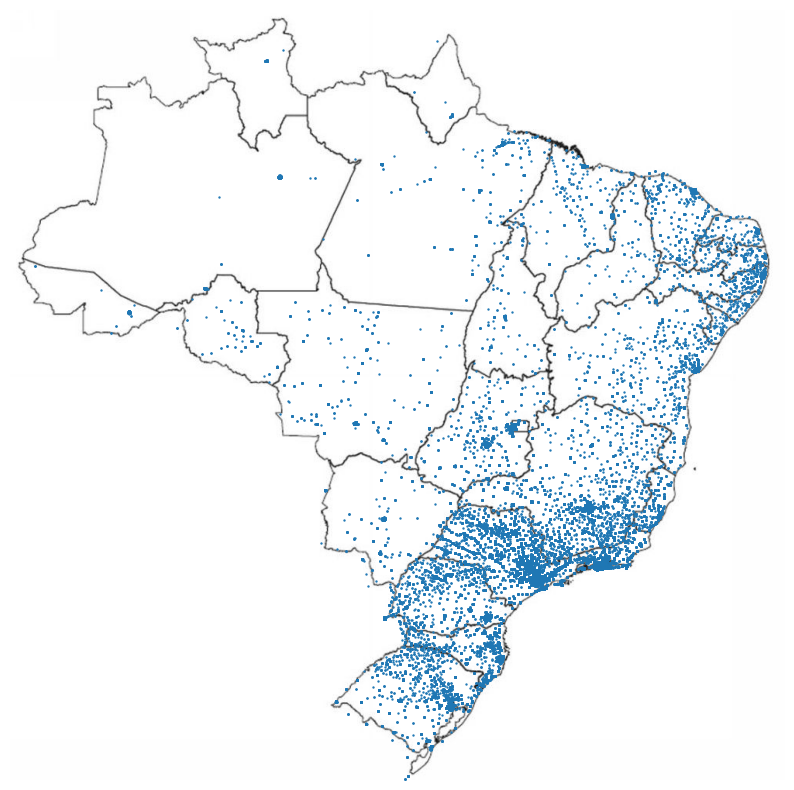

In [146]:
plot_brazil_map(distribution_customer)

In [147]:
distribution_customer.isna().sum()

geolocation_lng       0
geolocation_lat       0
customer_unique_id    0
dtype: int64

Berdasarkan data geografis, mayoritas pelanggan berasal dari wilayah selatan dan tenggara Brasil, dengan konsentrasi pelanggan tinggi di kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte. Hal ini menunjukkan bahwa area perkotaan di wilayah tersebut memiliki aktivitas belanja online yang lebih tinggi dibandingkan wilayah lainnya.

## 2. Bagaimana pertumbuhan orderan pelanggan setiap tahunnya

In [124]:
df_all.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
count,160583,160583,160583.000000,160583,160583,160583,160583,160583,160583.000000,160583,...,160583,160583.000000,160583,160583,160583.000000,160583,160583.000000,160583.000000,160583,160583
unique,96515,93395,NaN,4093,27,96515,7,NaN,NaN,4,...,3028,NaN,604,23,NaN,32170,NaN,NaN,71,70
top,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,NaN,NaN,credit_card,...,1f50f920176fa81dab994f9023523100,NaN,sao paulo,SP,NaN,422879e10f46682990de24d770e7f83d,NaN,NaN,cama_mesa_banho,bed_bath_table
freq,441,441,NaN,26726,69139,441,157362,NaN,NaN,116811,...,3965,NaN,40694,116061,NaN,1147,NaN,NaN,17381,17381
mean,NaN,NaN,34953.227010,NaN,NaN,NaN,NaN,2018-01-01 00:23:55.494429440,1.092351,NaN,...,NaN,24027.136646,NaN,NaN,1.618876,NaN,109.764183,19.614145,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,1.000000,NaN,...,NaN,1001.000000,NaN,NaN,1.000000,NaN,0.850000,0.000000,NaN,NaN
25%,NaN,NaN,11030.000000,NaN,NaN,NaN,NaN,2017-09-15 21:04:15.500000,1.000000,NaN,...,NaN,6162.000000,NaN,NaN,1.000000,NaN,36.900000,12.740000,NaN,NaN
50%,NaN,NaN,23587.000000,NaN,NaN,NaN,NaN,2018-01-20 22:18:20,1.000000,NaN,...,NaN,13566.000000,NaN,NaN,1.000000,NaN,69.000000,16.110000,NaN,NaN
75%,NaN,NaN,59114.000000,NaN,NaN,NaN,NaN,2018-05-04 06:04:18.500000,1.000000,NaN,...,NaN,25750.000000,NaN,NaN,2.000000,NaN,122.615000,21.120000,NaN,NaN
max,NaN,NaN,99980.000000,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,29.000000,NaN,...,NaN,99730.000000,NaN,NaN,21.000000,NaN,6735.000000,409.680000,NaN,NaN


In [125]:
grow_customer_year = df_all.resample(rule="YE", on="order_purchase_timestamp").agg({
    "order_id" : "nunique",
    "price" : "sum"
})

grow_customer_year.index = grow_customer_year.index.strftime('%Y')
grow_customer_year = grow_customer_year.reset_index() 
grow_customer_year = grow_customer_year.rename(columns={
    "order_purchase_timestamp" : "year",
    "order_id" : "total_order",
})

grow_customer_monthly = df_all.resample(rule="ME", on="order_purchase_timestamp").agg({
    "order_id" : "nunique",
    "price" : "sum"
})

grow_customer_monthly.index = grow_customer_monthly.index.strftime("%Y-%m")
grow_customer_monthly = grow_customer_monthly.reset_index()


grow_customer_monthly.rename(columns={
    "order_purchase_timestamp" : "month",
    "order_id" : "total_order",
}, inplace=True)

fig = px.line(grow_customer_year, 
              x="year", 
              y="total_order", 
              title="grow customer by year",
              markers=True,
              labels={"year": "Year", "total_order":"Total Order"})
fig.show()


fig = px.line(grow_customer_monthly[:len(grow_customer_monthly)-1], 
              x="month",
              y="total_order",
              markers=True,
              title="Grow Customer by Month",
              labels={"month": "Month", "total_order":"Total Order"})

fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

Dalam kurun waktu tiga tahun terakhir, dari 2016 hingga Agustus 2018, terdapat peningkatan jumlah order yang signifikan pada bulan November hingga Desember. Tren ini kemungkinan besar dipengaruhi oleh acara Black Friday dan musim liburan akhir tahun, yang sering kali mendorong peningkatan transaksi karena diskon besar-besaran dan promosi khusus.

## 3. produk paling top dan revenue

In [126]:
df_all.isna().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
dtype: int64

In [127]:
df_all

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,...,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_item_id,product_id,price,freight_value,product_category_name,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,moveis_escritorio,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,credit_card,...,b8bc237ba3788b23da09c0f1f3a3288c,88303,itajai,SC,1,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,utilidades_domesticas,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,moveis_escritorio,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,credit_card,...,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,1,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,moveis_escritorio,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,credit_card,...,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,1,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,casa_conforto,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,credit_card,...,527801b552d0077ffd170872eb49683b,17400,garca,SP,1,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,livros_interesse_geral,books_general_interest
160579,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,credit_card,...,3fd1e727ba94cfe122d165e176ce7967,14802,araraquara,SP,1,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,esporte_lazer,sports_leisure
160580,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,credit_card,...,d9e7e7778b32987280a6f2cb9a39c57d,3304,sao paulo,SP,1,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,beleza_saude,health_beauty
160581,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,credit_card,...,4869f7a5dfa277a7dca6462dcf3b52b2,14840,guariba,SP,1,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,relogios_presentes,watches_gifts


In [128]:
def product_analysis(produk, option):
    sort_by_column = None
    sort_order = None
    title = ""

    # Mapping untuk pilihan yang valid
    option_map = {
    "order terbanyak": ("total_order", False, "Top Order Product"),
    "order tersedikit": ("total_order", True, "Lower Order Product"),
    "total pendapatan terbanyak": ("total_pendapatan", False, "Top Product Income"),
    "total pendapatan tersedikit": ("total_pendapatan", True, "Lower Product Income")
    }

    if option in option_map:
        sort_by_column, sort_order, title = option_map[option]
    else:
        raise ValueError("Invalid option provided")

    
    fig = px.bar(produk.sort_values(by=sort_by_column, ascending=sort_order).head(10),
     x="product_name",
     y=sort_by_column,
     title=title,
     color=sort_by_column,
     color_continuous_scale=["#8FCAD6", "#67A6CF", "#1F77B4"],
     )
    fig.show()


In [129]:
top_produk = df_all.groupby("product_category_name_english").agg({
    "product_id" : "nunique",
    "price" : "sum"
}).reset_index()

top_produk.rename(columns={
    "product_id" : "total_order",
    "product_category_name_english" : "product_name",
    "price" : "total_pendapatan"
}, inplace=True)

product_analysis(top_produk, "order terbanyak")
product_analysis(top_produk, "total pendapatan terbanyak")
product_analysis(top_produk, "order tersedikit")
product_analysis(top_produk, "total pendapatan tersedikit")

In [130]:
revenue_year = df_all.resample(rule="Y", on="order_purchase_timestamp").agg({
    "price" : "sum"
})

revenue_year.index = revenue_year.index.strftime('%Y')
revenue_year = revenue_year.reset_index() 
revenue_year = revenue_year.rename(columns={
    "order_purchase_timestamp" : "year",
})

revenue_month = df_all.resample(rule="M", on="order_purchase_timestamp").agg({
    "price" : "sum"
})

revenue_month.index = revenue_month.index.strftime("%Y-%m")
revenue_month = revenue_month.reset_index()


revenue_month.rename(columns={
    "order_purchase_timestamp" : "month",
}, inplace=True)

fig = px.line(revenue_year, 
              x="year", 
              y="price", 
              title="revenue by year", markers=True)
fig.show()


fig = px.line(revenue_month[:len(grow_customer_monthly)-1], 
              x="month",
              y="price",
              markers=True,
              title="revenue by month")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")

/var/folders/dw/vp6jrdxx0k9cnkpqssvxcxhh0000gn/T/ipykernel_63997/3319471519.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

/var/folders/dw/vp6jrdxx0k9cnkpqssvxcxhh0000gn/T/ipykernel_63997/3319471519.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Kategori produk dengan jumlah order terbanyak meliputi bed bath table, sports leisure, furniture decor, dan health beauty. Dari sisi pendapatan, kategori bed bath table menghasilkan pendapatan tertinggi, diikuti oleh health beauty, computer accessories, watch gift, dan sports leisure. Ini menunjukkan bahwa produk dalam kategori kebutuhan rumah tangga dan kecantikan cukup diminati serta memiliki daya beli tinggi dari pelanggan, serta pendapatan tahunan terus meningkat yang di akibatkan oleh peningkatan orderan pelanggan setiap tahunnya

## 4. Cara pembelian pelanggan

In [131]:
customer_payment = df_all.groupby("payment_type").agg({
    "payment_sequential" : "sum"
}).reset_index()

fig = px.bar(customer_payment.sort_values(by="payment_sequential", ascending=False),
             x="payment_type", 
             y="payment_sequential",
             color="payment_sequential",
             color_continuous_scale=["#8FCAD6", "#67A6CF", "#1F77B4"],
             title="Top Payment")

fig.show()

Metode pembayaran yang paling sering digunakan adalah kartu kredit, diikuti oleh boleto (sistem pembayaran populer di Brasil) dan voucher. Penggunaan kartu kredit yang dominan menunjukkan preferensi pelanggan terhadap transaksi cepat dan kemudahan kredit, sementara opsi lain seperti boleto masih cukup populer sebagai alternatif pembayaran.

# Conclusion
1. Lokasi geografis manakah yang memiliki pelanggan terbanyak?
   - Berdasarkan data geografis, mayoritas pelanggan berasal dari wilayah selatan dan tenggara Brasil, dengan konsentrasi pelanggan tinggi di kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte. Hal ini menunjukkan bahwa area perkotaan di wilayah tersebut memiliki aktivitas belanja online yang lebih tinggi dibandingkan wilayah lainnya.
2. Bagaimana pertumbuhan orderan pelanggan setiap tahunnya?
   - Dalam kurun waktu tiga tahun terakhir, dari 2016 hingga Agustus 2018, terdapat peningkatan jumlah order yang signifikan pada bulan November hingga Desember. Tren ini kemungkinan besar dipengaruhi oleh acara Black Friday dan musim liburan akhir tahun, yang sering kali mendorong peningkatan transaksi karena diskon besar-besaran dan promosi khusus.
3. Produk yang paling top dan total revenue setiap tahun?
   - Kategori produk dengan jumlah order terbanyak meliputi bed bath table, sports leisure, furniture decor, dan health beauty. Dari sisi pendapatan, kategori bed bath table menghasilkan pendapatan tertinggi, diikuti oleh health beauty, computer accessories, watch gift, dan sports leisure. Ini menunjukkan bahwa produk dalam kategori kebutuhan rumah tangga dan kecantikan cukup diminati serta memiliki daya beli tinggi dari pelanggan, serta pendapatan tahunan terus meningkat yang di akibatkan oleh peningkatan orderan pelanggan setiap tahunnya 
4. Bagaimana cara pembelian pelanggan?
   - Metode pembayaran yang paling sering digunakan adalah kartu kredit, diikuti oleh boleto (sistem pembayaran populer di Brasil) dan voucher. Penggunaan kartu kredit yang dominan menunjukkan preferensi pelanggan terhadap transaksi cepat dan kemudahan kredit, sementara opsi lain seperti boleto masih cukup populer sebagai alternatif pembayaran.